In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import cm

отримаємо СЛАР відносно невідомих $с^{(k)}_j$, $j = 1, ..., n$. 

 $$
 A =
 \begin{pmatrix}
	 \begin{matrix}
	 	G^{(1)}_{11} & \dots  & G^{(1)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(1)}_{n1} & 		  & G^{(1)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
	 	G^{(2)}_{11} & \dots  & G^{(2)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(2)}_{n1} & 		  & G^{(2)}_{nn} \\
	 \end{matrix} \\
	 \begin{matrix}
		G^{(3)}_{11} & \dots  & G^{(3)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(3)}_{n1} & 		  & G^{(3)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
		G^{(4)}_{11} & \dots  & G^{(4)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(4)}_{n1} & 		  & G^{(4)}_{nn} \\
	 \end{matrix} \\
 \end{pmatrix}
 c = 
 \begin{pmatrix}
	c^{(1)}_1\\
	\vdots\\
	c^{(1)}_n\\
	c^{(2)}_1\\
	\vdots\\
	c^{(2)}_n\\
 \end{pmatrix}
 g = 
 \begin{pmatrix}
	2\pi g_1(x_1)\\
	\vdots\\
	2\pi g_1(x_n)\\
	2\pi g_2(x_1)\\
	\vdots\\
	2\pi g_2(x_n)\\
 \end{pmatrix}
 $$

In [2]:
def nu_x2(t):
    return np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))

def K11_1(t, tau):
    return -1/2

def K11_2(t, tau):
    if np.abs(t - tau) > eps:
        return 1/2*np.log( 4/np.e * np.sin((t - tau)/2)**2 \
                 / LA.norm(np.subtract(x1(t), x1(tau)))**2)
    else:
        return 1/2*np.log(1/(np.e * LA.norm(dx1(t))**2))

def K12(t, tau):
    return np.log(1/(LA.norm(np.subtract(x1(t), x2(tau)))))

def K21(t, tau):
    return np.dot(np.subtract(x1(tau), x2(t)), nu_x2(t)) \
            / LA.norm(np.subtract(x2(t), x1(tau)))**2

def K22(t, tau):
    if np.abs(t - tau) > eps:
        return np.dot(np.subtract(x2(tau), x2(t)), nu_x2(t)) \
                / LA.norm(np.subtract(x2(t), x2(tau)))**2
    else:
        return np.dot(ddx2(t), nu_x2(t)) / ((2*LA.norm(dx2(t)))**2)


In [3]:
a, b = 0, 2*np.pi


r1 = 0.9
r2 = 2
eps = 1e-50

M = 15
h = (b - a) / (2*M)
t = [(np.pi*j)/M for j in range(2*M)]

x1 = lambda t: (r1*np.cos(t), r1*np.sin(t))
x2 = lambda t: (r2*np.cos(t), r2*np.sin(t))
dx1 = lambda t: (-r1*np.sin(t), r1*np.cos(t))
dx2 = lambda t: (-r2*np.sin(t), r2*np.cos(t))
ddx2 = lambda t: (-r2*np.cos(t), -r2*np.sin(t))

A = np.zeros([4*M, 4*M])
g = np.zeros([4*M, 1])
psi1 = np.zeros([2*M, 1])
psi2 = np.zeros([2*M, 1])

In [4]:
# g1 = lambda t: 1
# g2 = lambda t: 0

# u = lambda x, y : 1

In [5]:
def g1(t):
    x, y = x1(t)
    return x**2 - y**2

def g2(t):
    x, y = x2(t)
    v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
    grad = np.array([2*x, 2*y])
    
    return np.dot(grad, v)

u = lambda x, y : x**2 - y**2

In [6]:
# def g1(t):
#     x, y = x1(t)
#     return x

# def g2(t):
#     x, y = x2(t)
#     v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
#     grad = np.array([1, 0])
    
#     return np.dot(grad, v)

# u = lambda x, y : x

In [7]:
# def R_j( M, t, tj ):
#     sum = 0;
#     for m in range(1, M-1):
#         sum = sum + np.cos(m*(t-tj))/m;     
    
#     return -1/(2*M)*(2*sum + np.cos(M*(t-tj))/M); 

In [8]:
def basicFunction(j, x, xx=t, h=h):
    n = len(xx) - 1
    
    if j >=1 and xx[j-1] <= x <= xx[j]:
        return (x - xx[j-1])/h
    elif j <= n-1 and xx[j] <= x <= xx[j+1]:
        return (xx[j+1] - x)/h
    else:
        return 0

In [9]:
def quadrature_with_ln_special_case(f, M=M):
    '''integral from 0 to 2pi'''

    tt = [i*np.pi/M for i in range(2*M)]

    R = lambda i, t: -1/(2*M) * (1
                                 + 2*sum([(1/m) * np.cos(m * (t - tt[i])) for m in range(1, M)])
                                 + 1/(M) * np.cos(t - tt[i]))
  
    def integral(t):
        return sum([R(j,t)*f(tt[j]) for j in range(2*M)])
  
    return integral

In [55]:
for i in range(2*M):
    for j in range(2*M):
        #K_1 = R_j(M, t[i], t[j])
        K_1 = quadrature_with_ln_special_case(lambda s: K11_1(t[i], s)*basicFunction(j, s))(t[i])
        
        # K11
        A[i][j] =  (K11_2(t[i], t[j])) / (2*M)
        A[i][j] += K_1
        
        # K12
        A[i][j + 2*M] = K12(t[i], t[j]) / (2*M)
        
        # K21
        A[i + 2*M][j] = (K21(t[i], t[j]) - 1) / (2*M)
        
        # K22
        A[i + 2*M][j + 2*M] = K22(t[i], t[j]) / (2*M)

    A[i + 2*M][i + 2*M] += 0.5 / LA.norm(dx2(t[i]))

    
    g[i] = g1(t[i])
    g[i + 2*M] = g2(t[i])


In [56]:
print(LA.det(A))
c = LA.solve(A, g)

-2.479959525918334e-59


In [57]:
for i in range(2*M):
    psi1[i] = c[i]
    psi2[i] = c[i + 2*M]

In [58]:
K1 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x1(tau))))
K2 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x2(tau))))

In [59]:
def u_approx(x, M=M, a=a, b=b):
    '''
    x є R2, тобто х - вектор з двох чисел
    n - кількість точок в розбитті

    '''
    t = [ (np.pi*j)/M for j in range(2*M)]
    
    u = 0
    for j in range(2*M):
        u = u + psi1[j] * K1(x, t[j])
        u = u + psi2[j] * K2(x, t[j])
        
    u = u / (2*M)
    
    return u

In [60]:
print(u_approx([1.5, 0]))
print(u(1.5, 0))

#0.99845591

[1.73030683]
2.25


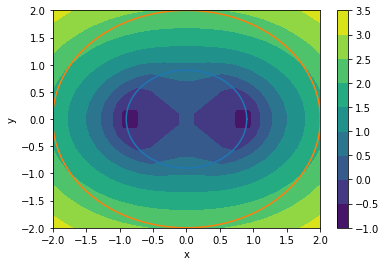

In [61]:
n_ = 20

x = np.linspace(-r2, r2, n_)
y = np.linspace(-r2, r2, n_)

xx_, yy_ = np.meshgrid(x, y)
zz_ = np.zeros([n_, n_])

for i, x_ in enumerate(x):
    for j, y_ in enumerate(y):
        zz_[i][j] = u_approx([x[i], y[j]])

# Draw contour
fig_contour,ax=plt.subplots(1,1)
cp = ax.contourf(xx_, yy_, zz_)
fig_contour.colorbar(cp) # Add a colorbar to a plot

# Draw curves
xxx = np.linspace(0, 2*np.pi, 100)
yyy = np.linspace(0, 2*np.pi, 100)

ax.plot(x1(xxx)[0], x1(xxx)[1])
ax.plot(x2(xxx)[0], x2(xxx)[1])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

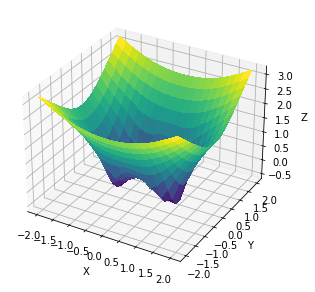

In [62]:
# %matplotlib notebook

fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx_, yy_, zz_, rstride=1, cstride=1, linewidth=1, antialiased=False, cmap=cm.viridis)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [18]:
# zz__ = np.zeros([n_, n_])

# for i, x_ in enumerate(x):
#     for j, y_ in enumerate(y):
#         zz__[i][j] = u(x[i], y[j])

# fig = plt.figure(figsize=(5, 5))
# ax = fig.gca(projection='3d')

# surf = ax.plot_surface(xx_, yy_, zz__, rstride=1, cstride=1, linewidth=1, antialiased=False, cmap=cm.viridis)

# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")

# plt.show()